# Transformations isométriques

Dans le monde du calcul vectoriel (ou matriciel) on parle d'automophisme orthogonal plutôt que de transformation isométrique comme on
le verra à la fin.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.set_printoptions(precision=3, linewidth=150, suppress=True)
plt.style.use(['seaborn-whitegrid','data/cours.mplstyle'])

/tmp/ipykernel_1965653/96000309.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid','data/cours.mplstyle'])


In [4]:
angle = np.array([θ for θ in np.linspace(-np.pi/2,np.pi/2,7)])
shape1 = np.concatenate([np.array([np.cos(angle), np.sin(angle)]), \
                         np.array([[-0.5, -1, -1, -1], [1, 1, 0.5, 0]]), \
                         np.array([[-0.5, 0], [-0.5, -1]])], axis=1)
print(shape1)

[[ 0.     0.5    0.866  1.     0.866  0.5    0.    -0.5   -1.    -1.    -1.    -0.5    0.   ]
 [-1.    -0.866 -0.5    0.     0.5    0.866  1.     1.     1.     0.5    0.    -0.5   -1.   ]]


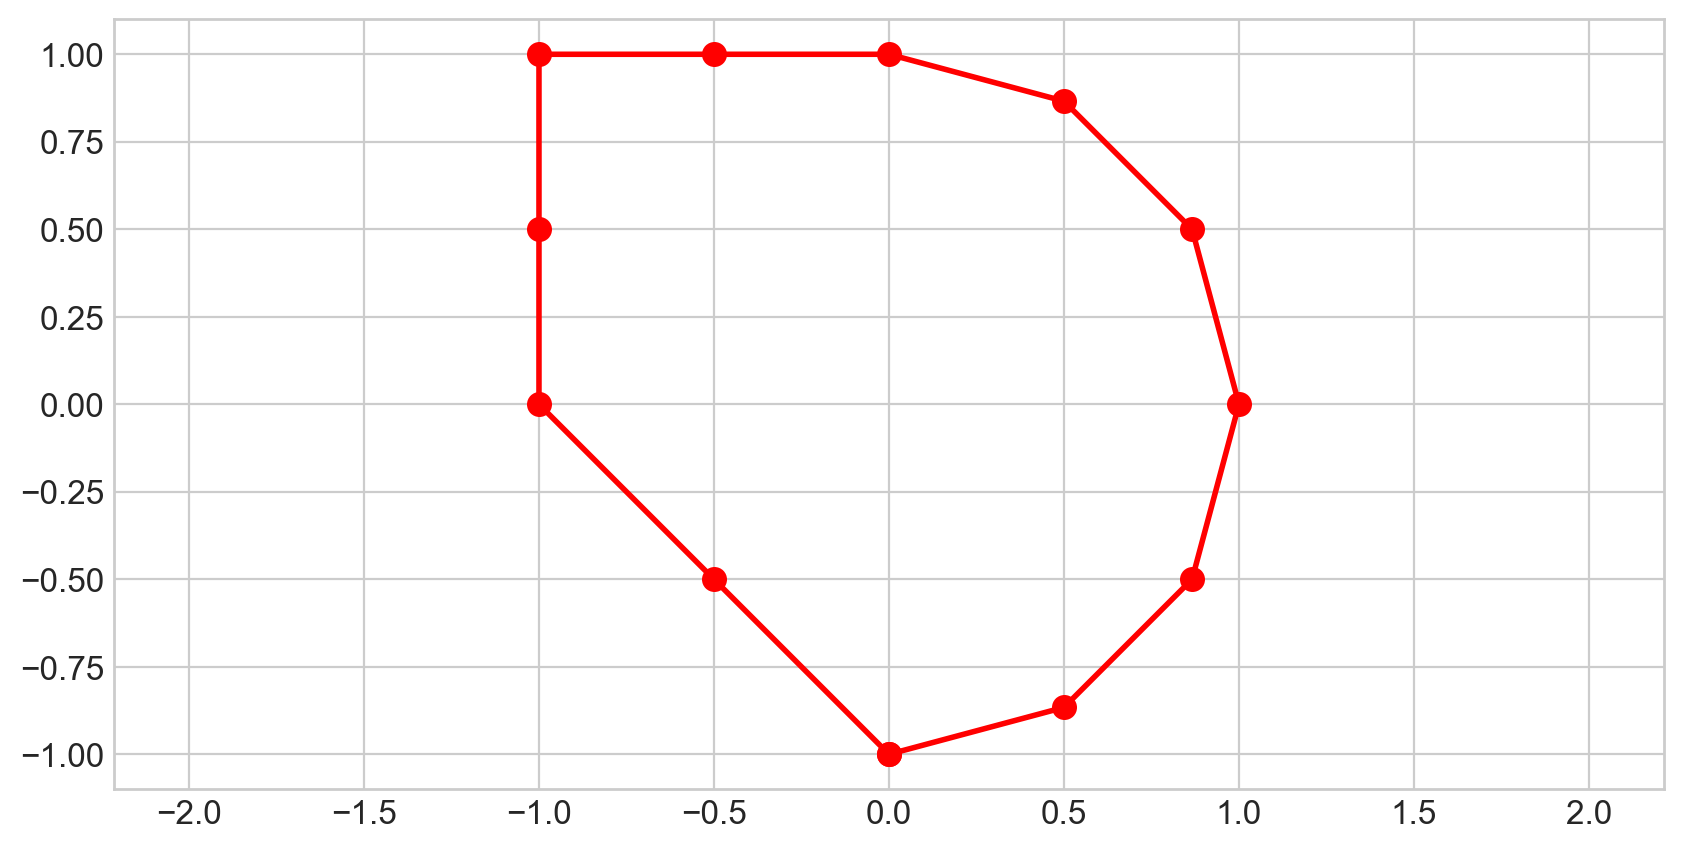

In [5]:
plt.plot(shape1[0], shape1[1], '-or')
plt.axis('equal');

## Matrice de rotation centrée en (0,0)

R = 
$
\begin{bmatrix}
cos(θ) & -sin(θ) \\
sin(θ) & cos(θ)  \\
\end{bmatrix}
$

### Propriétés

* Effectue une rotation de centre (0,0) et d'angle θ
* Déterminant = 1
* Matrice orthogonale $\rightarrow$ pas de déformation ni d'agrandissement de la forme (automorphisme orthogonal)

[[ 0.707 -0.707]
 [ 0.707  0.707]]


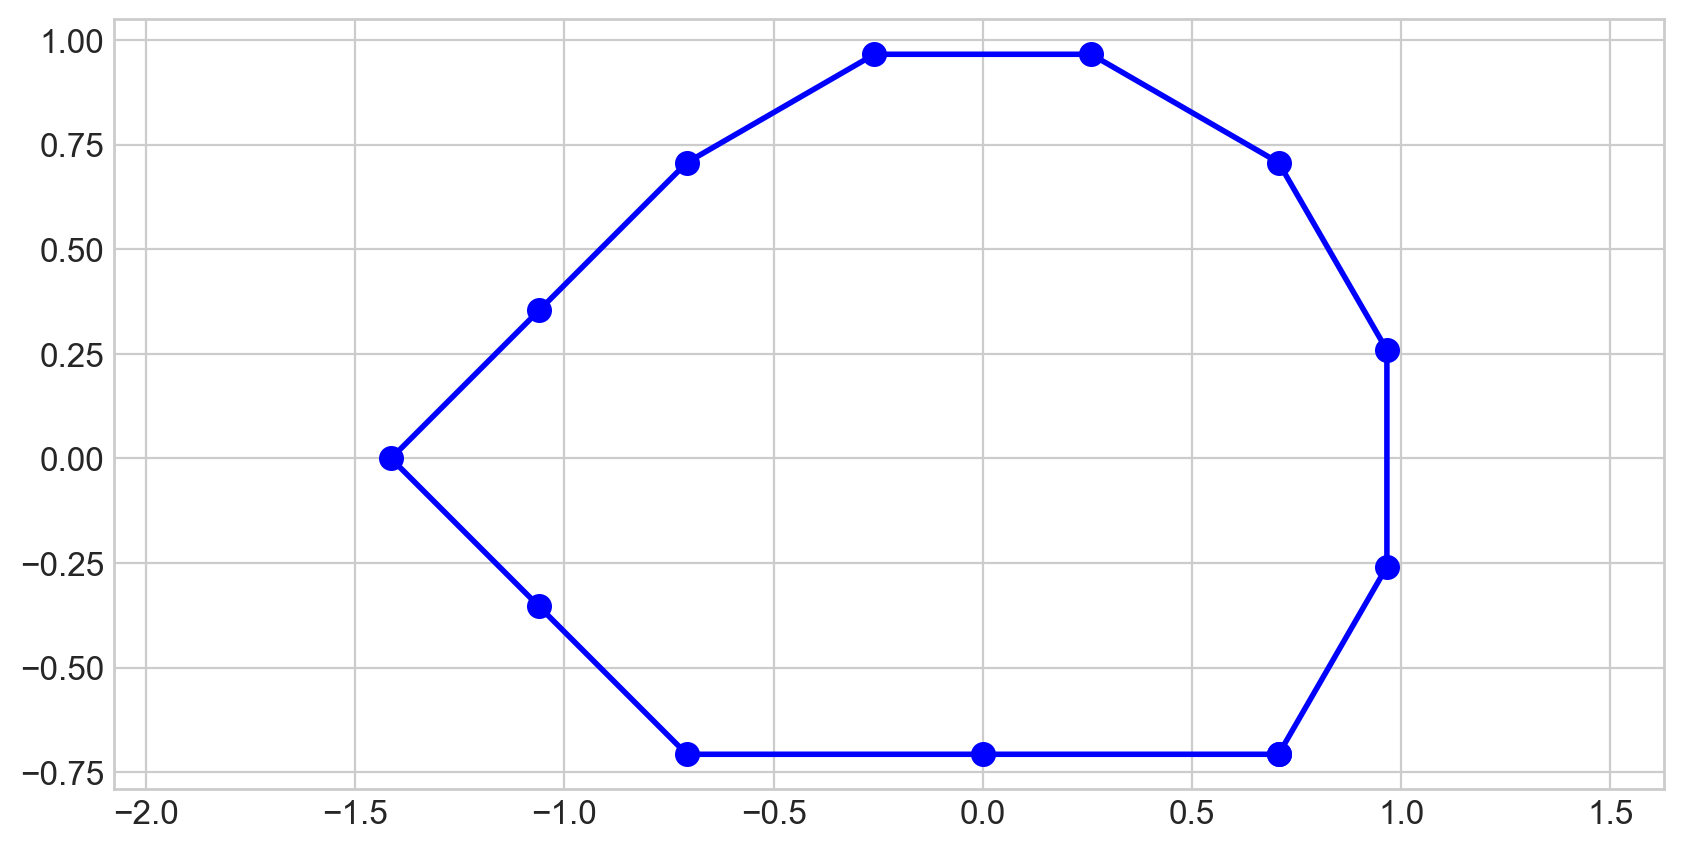

In [5]:
θ = np.pi / 4

R = np.array([[np.cos(θ), -np.sin(θ)], [np.sin(θ), np.cos(θ)]])
print(R)

shape2 = R @ shape1

plt.plot(shape2[0], shape2[1], '-ob')
plt.axis('equal');

np.save("mouse.npy", shape2) # pour le prochain cours

Matrice orthogonale donc (par définition) $R.R^T = \textrm{Id}$

In [6]:
R @ R.T

array([[1., 0.],
       [0., 1.]])

Donc la transposée est la rotation d'angle -θ ce qui est logique puisque sinus est une fonction impaire.

## Symétrie axiale

La symétrie horizontale, qui transforme (a,b) en (a,-b), est 

Sx = 
$
\begin{bmatrix}
1 & 0 \\
0 & -1  \\
\end{bmatrix}
$

On voit donc que pour avoir une symétrie axiale par rapport à une droite qui passe par (0,0) il suffit de 

* faire une rotation pour mettre l'axe de symétrie à l'horizontale
* appliquer la symétrie horizontale
* faire la rotation inverse

Ainsi la symétrie axiale par rapport à la droite qui passe en (0,0) et qui a un angle d'alpha est :

$S = R_{-α}^{-1}\; Sx\; R_{-α} = R_α\;Sx\; R_{-α}$

Notez que l'ordre des matrices est l'inversé puisqu'on applique les points **x** *à droite* de $S$. 

[[-0.766  0.643]
 [ 0.643  0.766]]


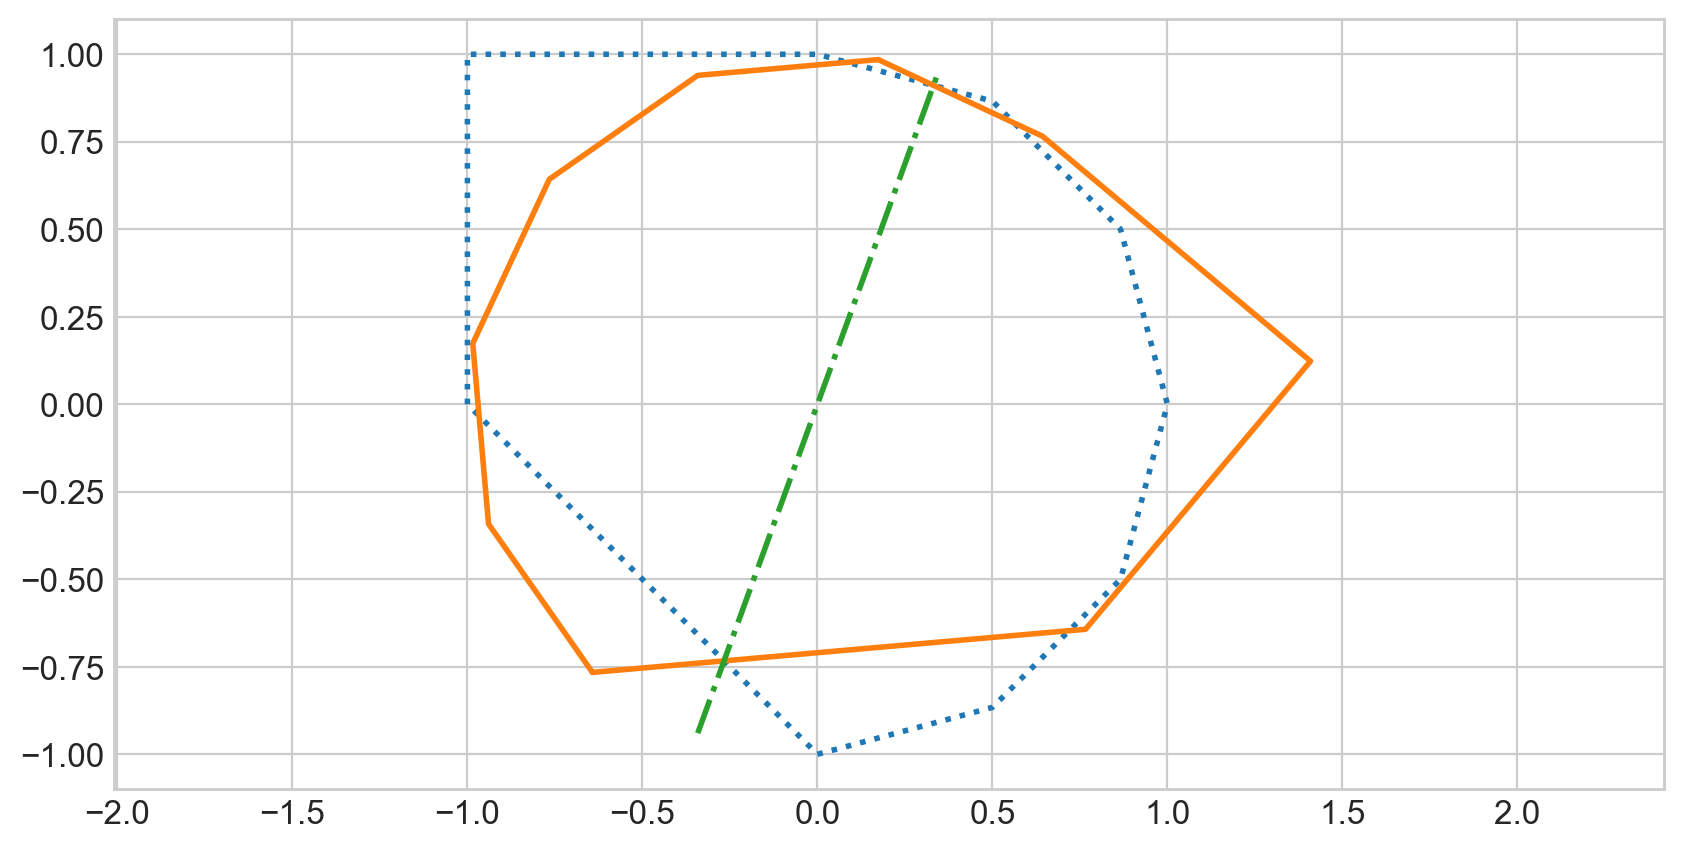

In [6]:
def Rα(α):
    return np.array([[np.cos(α), -np.sin(α)], [np.sin(α), np.cos(α)]])

Sx = np.array([[1, 0],[0,-1]])

θ = 70 * (2 * np.pi)/360  # 70 degrés

shape2 = Rα(θ) @ Sx @ Rα(-θ) @ shape1

print(Rα(θ) @ Sx @ Rα(-θ))

plt.plot(shape1[0], shape1[1], ":")
plt.plot(shape2[0], shape2[1])
plt.plot([-np.cos(θ),np.cos(θ)],[-np.sin(θ),np.sin(θ)],"-.")  # axe de symétrie
plt.axis('equal');

In [7]:
θ = np.pi / 4
Rα(θ) @ Sx @ Rα(-θ)

array([[ 0.,  1.],
       [ 1., -0.]])

## Translation

On ne peut pas exprimer la translation avec un produit matriciel car ce n'est pas une application linéaire :

$T(2\;\textbf{x}) \ne 2\; T(\textbf{x})$

Ce n'est pas non plus une transformation isométrique car la distance d'un point à (0,0) change après une translation.

D'un point de vue vectoriel une translation est une addition :

$T(\textbf{x}) = \textbf{x} + \textbf{v}_t$ 

Il existe un truc pour exprimer les translations sous forme de produit matriciel : on change la représentation des points :

$\textbf{x} = (x_1, x_2)$ devient $\textbf{x} = (x_1, x_2, 1)$

(On parle aussi des <a href="https://fr.wikipedia.org/wiki/Coordonn%C3%A9es_homog%C3%A8nes">coordonnées homogènes</a>.)

Ainsi la translation par le vecteur $(v_1, v_2)$ est 

$T(X) = 
\begin{bmatrix}
1 & 0 & v_1\\
0 & 1 & v_2 \\
0 & 0 & 1 \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
1 \\
\end{bmatrix}
$

On peut vérifier que $T$ est bien une application linéraire puisque $T(2\;\textbf{x}) = 2\; T(\textbf{x})$.

Translate matrix:
 [[1. 0. 1.]
 [0. 1. 2.]
 [0. 0. 1.]]
Shape1 3d:
 [[ 0.     0.5    0.866  1.     0.866  0.5    0.    -0.5   -1.    -1.    -1.    -0.5    0.   ]
 [-1.    -0.866 -0.5    0.     0.5    0.866  1.     1.     1.     0.5    0.    -0.5   -1.   ]
 [ 1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.     1.   ]]
Shape2 3d:
 [[1.    1.5   1.866 2.    1.866 1.5   1.    0.5   0.    0.    0.    0.5   1.   ]
 [1.    1.134 1.5   2.    2.5   2.866 3.    3.    3.    2.5   2.    1.5   1.   ]
 [1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.   ]]


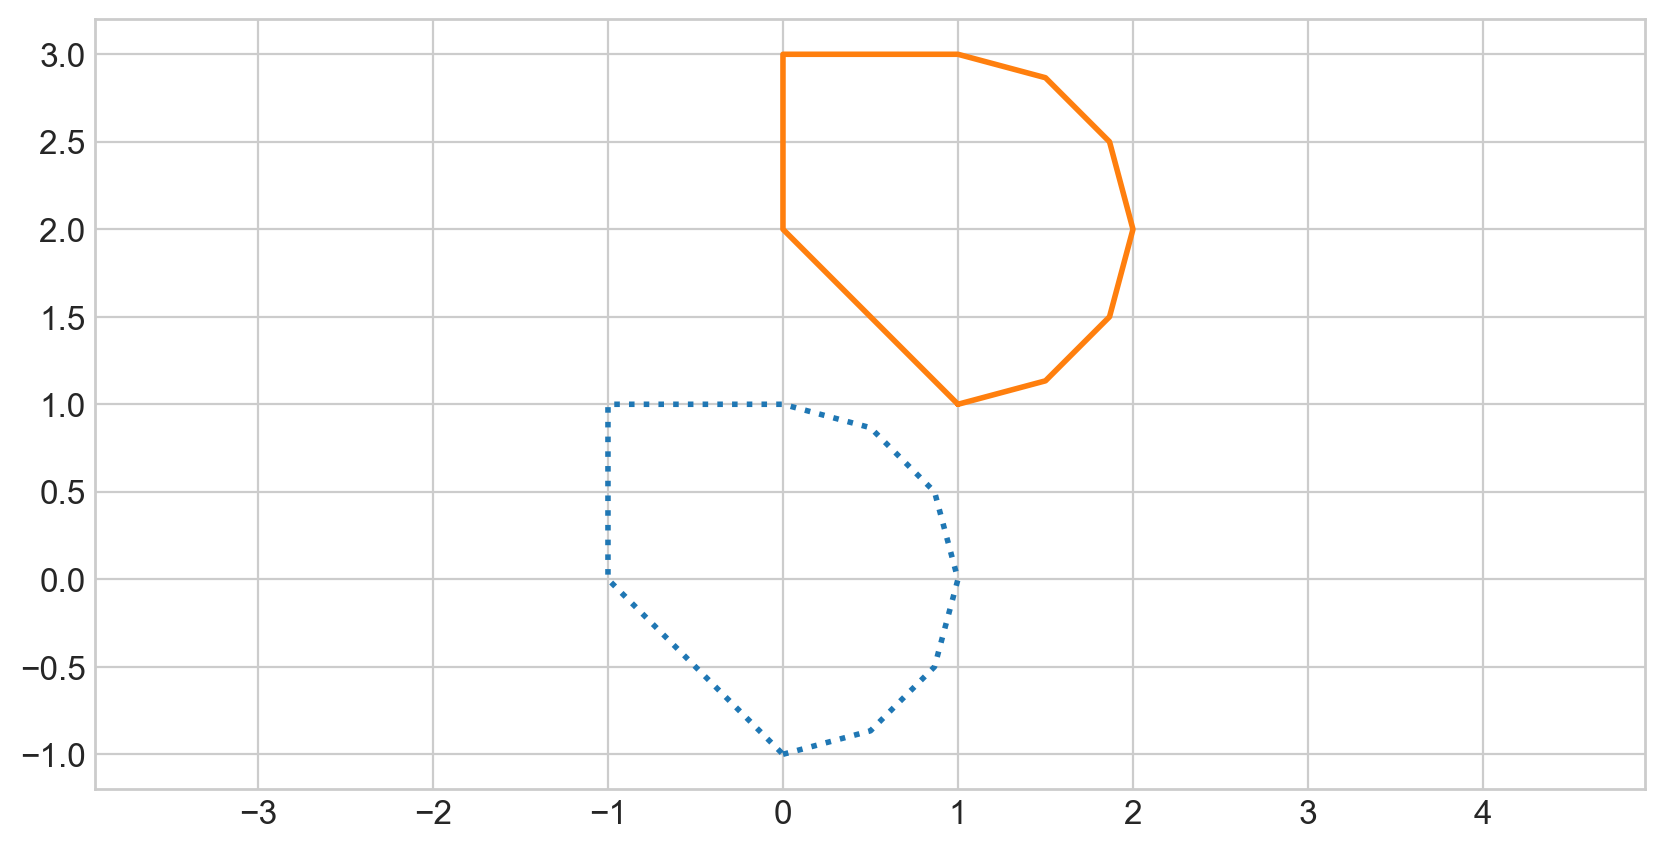

In [9]:
v = np.array([1,2])

T = np.identity(3)
T[0:2,-1] = v
print("Translate matrix:\n", T)

shape1_3d = np.concatenate([shape1, np.ones((1, len(shape1[0])))], axis=0)
print("Shape1 3d:\n", shape1_3d)

shape2 = T @ shape1_3d
print("Shape2 3d:\n", shape2)

plt.plot(shape1[0], shape1[1], ":")
plt.plot(shape2[0], shape2[1])
plt.axis('equal');

La matrice inverse de notre matrice de translation est celle qui remet la forme orange à sa place d'origine, donc qui applique la transaltion $-\textbf{v} = (-1,-2)$.

$T^{-1} = 
\begin{bmatrix}
1 & 0 & -1\\
0 & 1 & -2 \\
0 & 0 & 1 \\
\end{bmatrix}
$

ce qui n'est pas la transposée de T donc T n'est pas orthogonale.

Le piège est qu'il y a 2 types d'isométries :

* l'isométrie vectorielle ou automorphisme orthogonal qui veut que $\forall\, \textbf{x}, \;||\textbf{f}(\textbf{x})|| = ||\textbf{x}||$ ainsi que la conservation des angles
* l'isométrie géométrique qui veut que $\forall\, \textbf{a}, \textbf{b}, \; ||\textbf{f}(\textbf{a}) - \textbf{f}(\textbf{b})|| = ||\textbf{a} - \textbf{b}||$.

La translation est bien une isométrie géométrique mais pas vectorielle d'où le fait qu'on préfère parler d'automorphisme orthogonal plutôt que d'isométrie pour ne pas prêter à confusion.

## Exercice 1.1

Écrire sous forme d'un produit matriciel la symétrie axiale par rapport à un axe qui ne passe pas par (0,0).
On prendra l'axe qui passe par (2,0) et qui a un angle de π/3 par rapport à l'horizontale.

Est-ce un automorphisme orthogonal ? Le montrer.